In [1]:
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

col_names = ["submission_id", "session", "date", "level","code","server_error","client_error","version","lang", "email", "username", "is_test", "demo", "start"]
df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

df['level'] = pd.to_numeric(df.level, errors='coerce')
df = df.loc[df['level'] < 14]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
concepts = ['print', 'ask', 'echo', 'is', 'random', 'if', 'else', 'repeat', 'for']

#Do some general length analysis
df['code_char_length'] = df['code'].str.len()
df['code_word_length'] = df['code'].str.count(' ') + 1
df['code_line_length'] = df['code'].str.count('\n') + 1
df['code_keyword_length'] = 0

for concept in concepts:
    df['code_keyword_length'] = df['code_keyword_length'] + df['code'].str.count(concept)

char_code_length = df['code_char_length'].mean()
word_code_length = df['code_word_length'].mean()
line_code_length = df['code_line_length'].mean()
keyword_code_length = df['code_keyword_length'].mean()

print(df['code_line_length'].max())
print(df['code_word_length'].max())
print(df['code_char_length'].max())

print("The average code length is: " + str(char_code_length) + " characters")
print("The average code length is: " + str(word_code_length) + " words")
print("The average lines length is: " + str(line_code_length) + " lines")
print("The average use of keywords is: " + str(keyword_code_length) + " per program")

16080.0
680679.0
682609.0
The average code length is: 138.05086228898531 characters
The average code length is: 28.079955219972355 words
The average lines length is: 5.490149056835169 lines
The average use of keywords is: 7.407736901593321 per program


In [10]:
print(df['level'].corr(df['code_char_length']))
print(df['level'].corr(df['code_word_length']))
print(df['level'].corr(df['code_line_length']))
print(df.corr())

0.029588568306223983
0.013224047337094843
0.022549555676614517
                        level  code_char_length  code_word_length  \
level                1.000000          0.029589          0.013224   
code_char_length     0.029589          1.000000          0.736458   
code_word_length     0.013224          0.736458          1.000000   
code_line_length     0.022550          0.296060          0.386071   
code_keyword_length  0.263715          0.163837          0.051404   

                     code_line_length  code_keyword_length  
level                        0.022550             0.263715  
code_char_length             0.296060             0.163837  
code_word_length             0.386071             0.051404  
code_line_length             1.000000             0.071526  
code_keyword_length          0.071526             1.000000  


[Text(0, 0.5, 'Character count'), Text(0.5, 0, 'Level')]

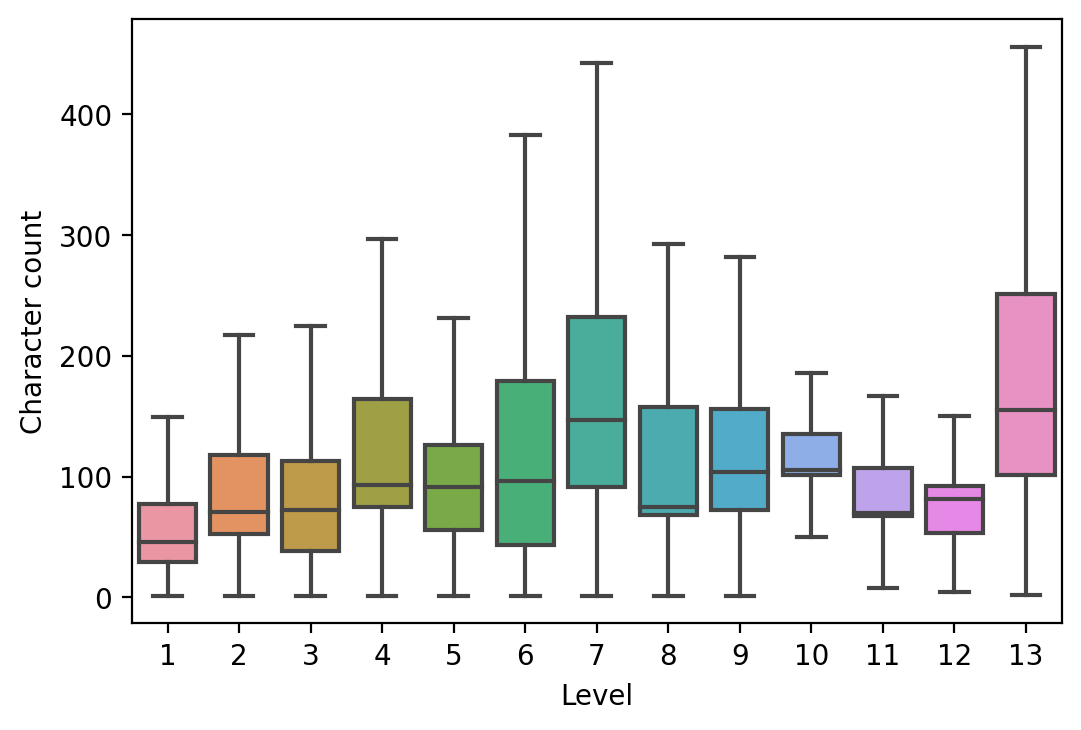

In [6]:
plot = sns.boxplot(x="level", y="code_char_length", data=df, showfliers=False);
plot.set(xlabel='Level', ylabel='Character count')

[Text(0, 0.5, 'Word count'), Text(0.5, 0, 'Level')]

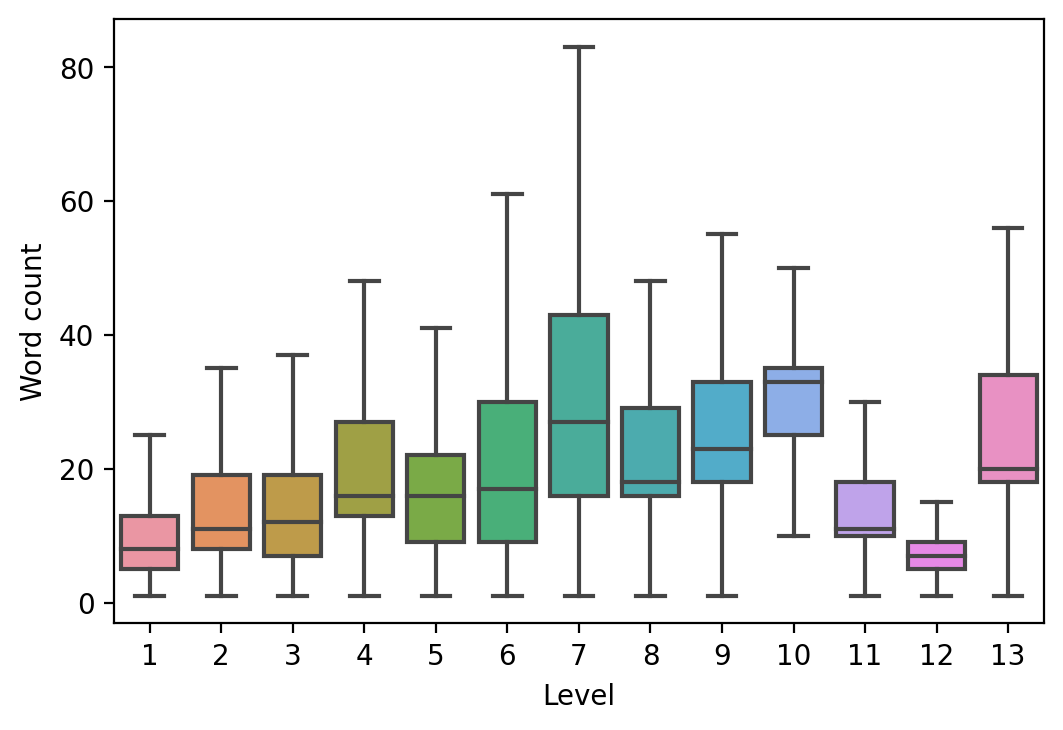

In [16]:
plot = sns.boxplot(x="level", y="code_word_length", data=df, showfliers=False);
plot.set(xlabel='Level', ylabel='Word count')

[Text(0, 0.5, 'Line count'), Text(0.5, 0, 'Level')]

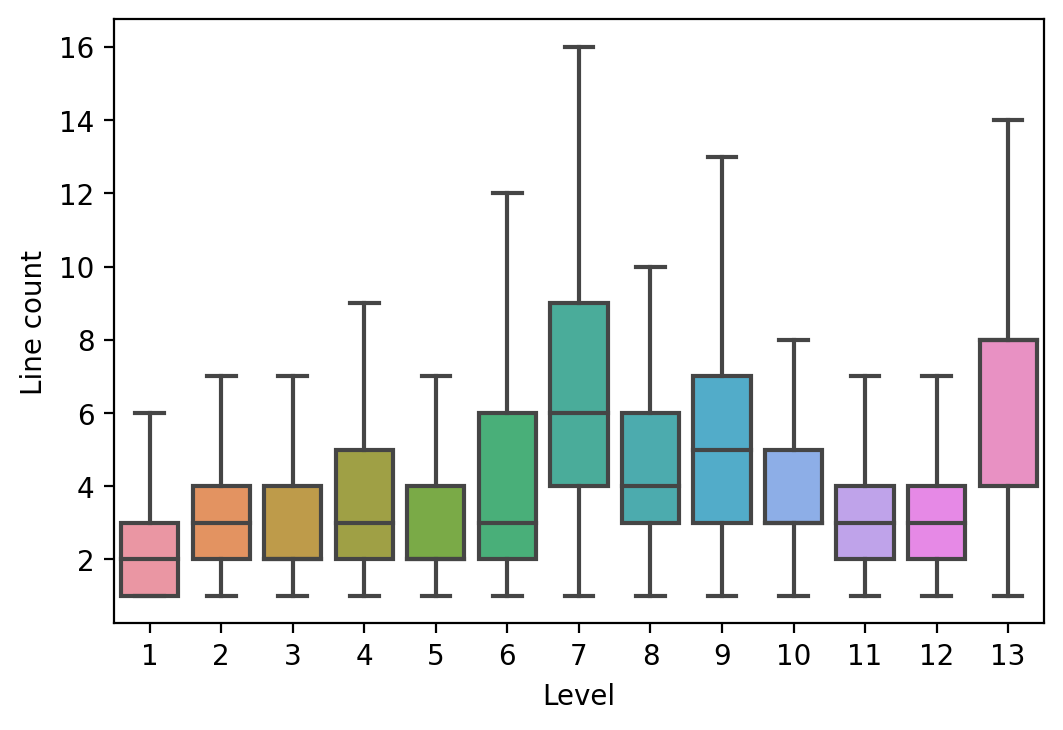

In [17]:
plot = sns.boxplot(x="level", y="code_line_length", data=df, showfliers=False);
plot.set(xlabel='Level', ylabel='Line count')

[Text(0, 0.5, 'Keyword count'), Text(0.5, 0, 'Level')]

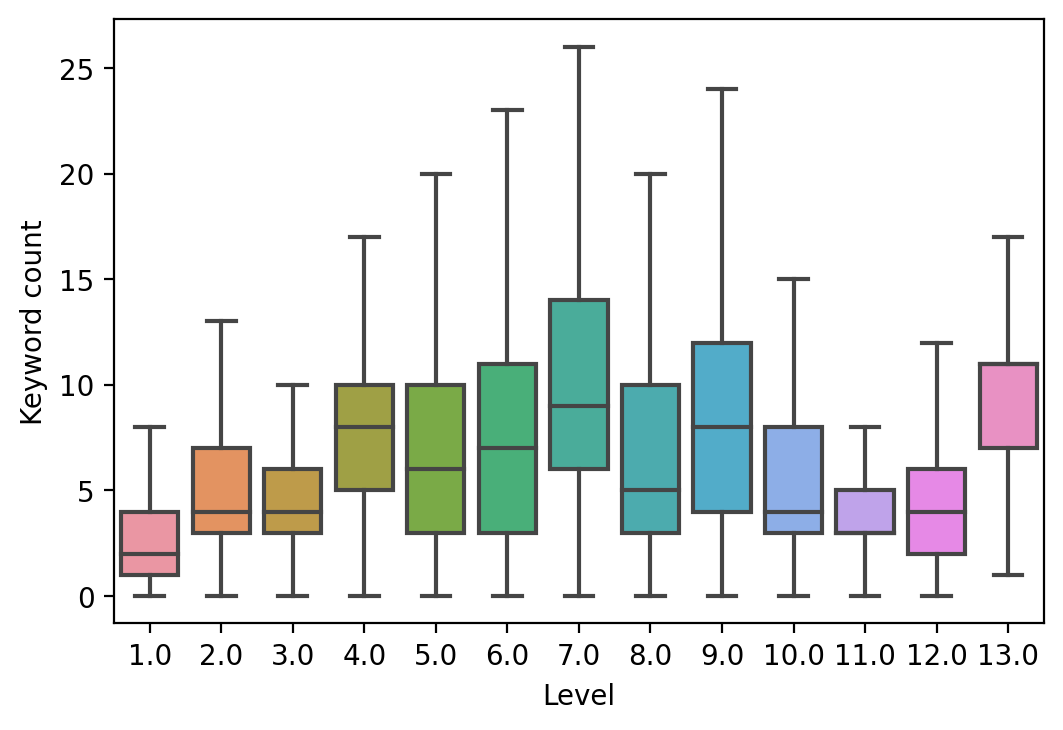

In [14]:
plot = sns.boxplot(x="level", y="code_keyword_length", data=df, showfliers=False);
plot.set(xlabel='Level', ylabel='Keyword count')